## chapter 3: enhancing images
by [Saeed Arbabi](https://github.com/sarbabi) (Oct. 27, 2018)

__learning objectives:__
1. Learn how to adjust brightness and contrast levels of an image
2. Add code to selectively modify the color of an image and create gray scale images and negatives
3. Use PIL functionality to combine two images together and add transparency effects to the image
4. Apply various image-enhancement filters to an image to achieve effects such as smoothing, sharpening, embossing, and so on

__exercise:__
Undertake a project to develop a tool to add a watermark or text or a date stamp to an image

### adjusting brightness and contrast
- brightness adjustment helps make the image brighter or darker
- contrast adjustments emphasize differences between the color and brightness level within the image data

The image can be made lighter or darker using the _ImageEnhance_ module in PIL. The same module provides a class that can auto-contrast an image.

_adjust the brightness of the image_

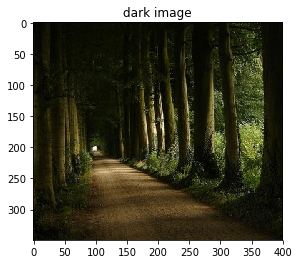

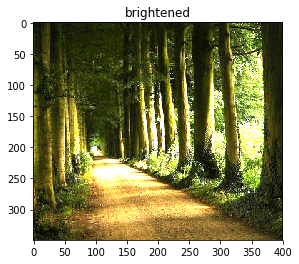

In [8]:
#import required modules
from PIL import Image
from PIL import ImageEnhance
import matplotlib.pyplot as plt

#open and show the dark image
img = Image.open("images/dark-forest.jpg")
plt.imshow(img)
plt.title("dark image")
plt.show()

#use brightness().enhance() to brighten the image
brightness = 3
enhancer = ImageEnhance.Brightness(img)
img_bright = enhancer.enhance(brightness)

#save and show the brightened image
img_bright.save("brightened.jpg")
plt.imshow(img_bright)
plt.title("brightened")
plt.show()

_change the contrast level of the image_

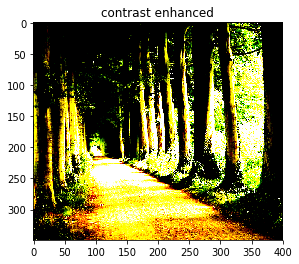

In [13]:
#use contrast.enhance to improve the contrast of the image
contrast = 4
enhancer = ImageEnhance.Contrast(img_bright)
con = enhancer.enhance(contrast)

#save and show the con image
con.save("contrasted.jpg")
plt.imshow(con)
plt.title("contrast enhanced")
plt.show()

_ask PIL automatically set to appropriate contrast level for the image using ImageOps.autocontrast_

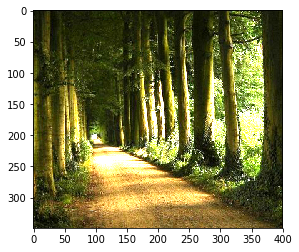

In [14]:
#import required libraries
from PIL import ImageOps

#let it automatically set the contrast level of the image
img_autocon = ImageOps.autocontrast(img_bright, cutoff=0)

#show the resulting image
plt.imshow(img_autocon)


### tweaking colors
_swapping band data in the image_

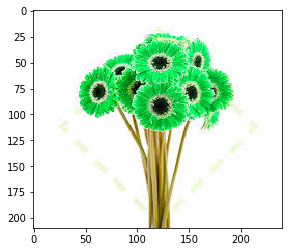

In [20]:
#open and show the image 
img = Image.open("images/flowers.png")

#use img.convert to make it 4bands
img = img.convert("RGBA")

#use img.split to find the values for each band
r, g, b, a = img.split()

#merge the values of bands using Image.merge(mode, (bands)) to generate new image
img_merged = Image.merge("RGBA", (g, r, b, a))
plt.imshow(img_merged)
#show the resultant image


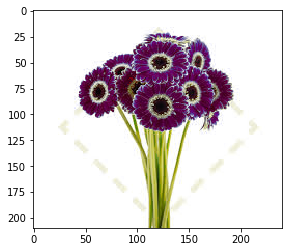

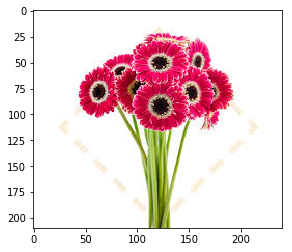

In [28]:
#use the r.point function with a lambda to fill the mask and save it
msk = r.point(lambda i: i>120 and 150)
msk.save("r_selection.jpg")

#use r.paste paste g into r using the mask and save it
r.paste(g, None, msk)
r.save("rmasked_part.jpg")

#merge again the bands into the image
img = Image.merge("RGBA", (r, g, b, a))

#save and show the resultant image
img.save("img_changedband.png")
plt.imshow(img)
plt.show()

### gray scale images
using:
- img.convert('L')
- ImageOps.grayscale(img)
- Image.new('L', size)

In [33]:
#gray the image and save them
img = Image.open("images/flower.jpg")
grayed = img.convert('L')
grayed.save("grayed.jpg")

#second way for making an image gray
grayed_imgops = ImageOps.grayscale(img)
grayed_imgops.save("grayed2.jpg")

### negative of an image
_ImageOps.invert_

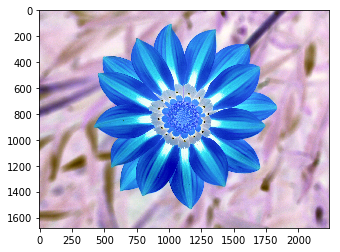

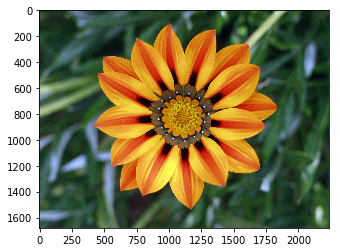

In [35]:
#invert the colors of the image and show it
negatived = ImageOps.invert(img)
plt.imshow(negatived)
plt.show()

plt.imshow(img)
plt.show()